In [32]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

df_allscenarios = pd.read_excel('AllScenariosPreped.xlsx')
df_allscenarios=df_allscenarios.drop(columns= [ "Unnamed: 0", "Unnamed: 0.1", "index"])

#Add columns for minimum and maximum response time
from ast import literal_eval

df_allscenarios.Response_times_visitors= df_allscenarios.Response_times_visitors.apply(literal_eval)
df_allscenarios.Evac_times_visitors= df_allscenarios.Evac_times_visitors.apply(literal_eval)

df_allscenarios["MinRespvist"] = " "
df_allscenarios["MaxRespvist"] = " "
for y in df_allscenarios.index:
    
    z=df_allscenarios.iloc[y]['Response_times_visitors']
    df_allscenarios["MinRespvist"][y]=np.min(z)
    
    z=df_allscenarios.iloc[y]['Response_times_visitors']
    df_allscenarios["MaxRespvist"][y]=np.max(z)
    

C:\Users\elvir\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\elvir\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
#Avg resp vs Avg evac
# Avg resp vs total evac

df_basic=df_allscenarios.loc[df_allscenarios[ "Familiarity"]==50]
df_basic=df_basic.loc[df_basic[ "Chance_friends_in_building"]==30]
df_basic=df_basic.loc[df_basic[ "Num_staff"]==20]
df_basic=df_basic.loc[df_basic[ "Num_Visitors"]<201]
df_basic=df_basic.loc[df_basic[ "Num_Visitors"]>99]



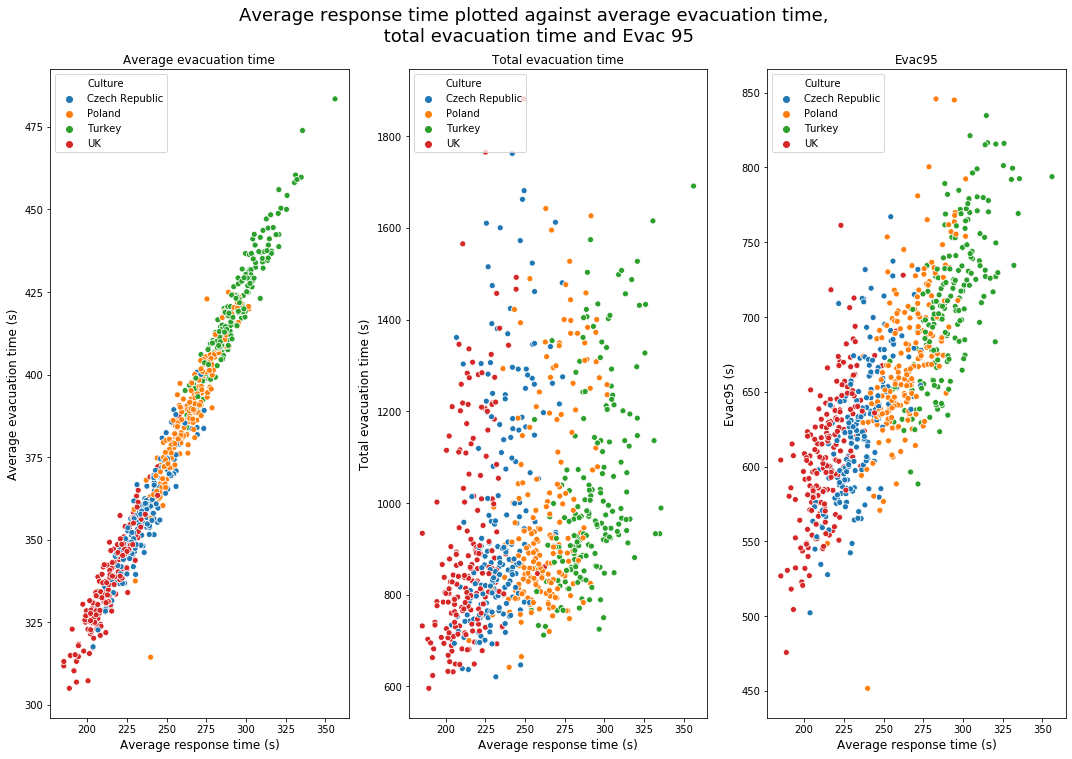

In [35]:
sns.set_palette("tab10")

df_basic_AvgevacvsAvgresp=df_basic.loc[df_basic[ "AvgevacVist"]>280]
df_basic_TotalevacvsAvgresp=df_basic.loc[df_basic[ "AvgrespVist"]>175]
df_basic_Evac95vsAvgresp=df_basic.loc[df_basic[ "AvgrespVist"]>175]

fig, axs = plt.subplots(1, 3, figsize=(15, 10), sharey=False, )


g1=sns.scatterplot(ax=axs[0], x="AvgrespVist", y="AvgevacVist", data=df_basic_AvgevacvsAvgresp, hue= "Culture", hue_order = [ "Czech Republic", "Poland", "Turkey", "UK"] );
g1.set_ylabel('Average evacuation time (s)', fontsize=12)
g1.set_xlabel('Average response time (s)', fontsize=12)
g1.legend(loc="upper left")
g1.set_title("Average evacuation time")

g2=sns.scatterplot( ax=axs[1], x="AvgrespVist", y="Total_evacuation_time", data=df_basic_TotalevacvsAvgresp, hue= "Culture", hue_order = [ "Czech Republic", "Poland", "Turkey", "UK"] );
g2.set_ylabel('Total evacuation time (s)', fontsize=12)
g2.set_xlabel('Average response time (s)', fontsize=12)
g2.set_title("Total evacuation time")
g2.legend(loc="upper left")

g3=sns.scatterplot(ax = axs[2], x="AvgrespVist", y="Evac95", data=df_basic_Evac95vsAvgresp, hue= "Culture", hue_order = [ "Czech Republic", "Poland", "Turkey", "UK"] );
g3.set_ylabel('Evac95 (s)', fontsize=12)
g3.set_xlabel('Average response time (s)', fontsize=12)
g3.set_title("Evac95")
g3.legend(loc="upper left")


fig.suptitle('Average response time plotted against average evacuation time, \n total evacuation time and Evac 95' , fontsize=18, y = 1.05)

plt.tight_layout()
plt.savefig("ScatterOutcomes.png", dpi=300, bbox_inches='tight')


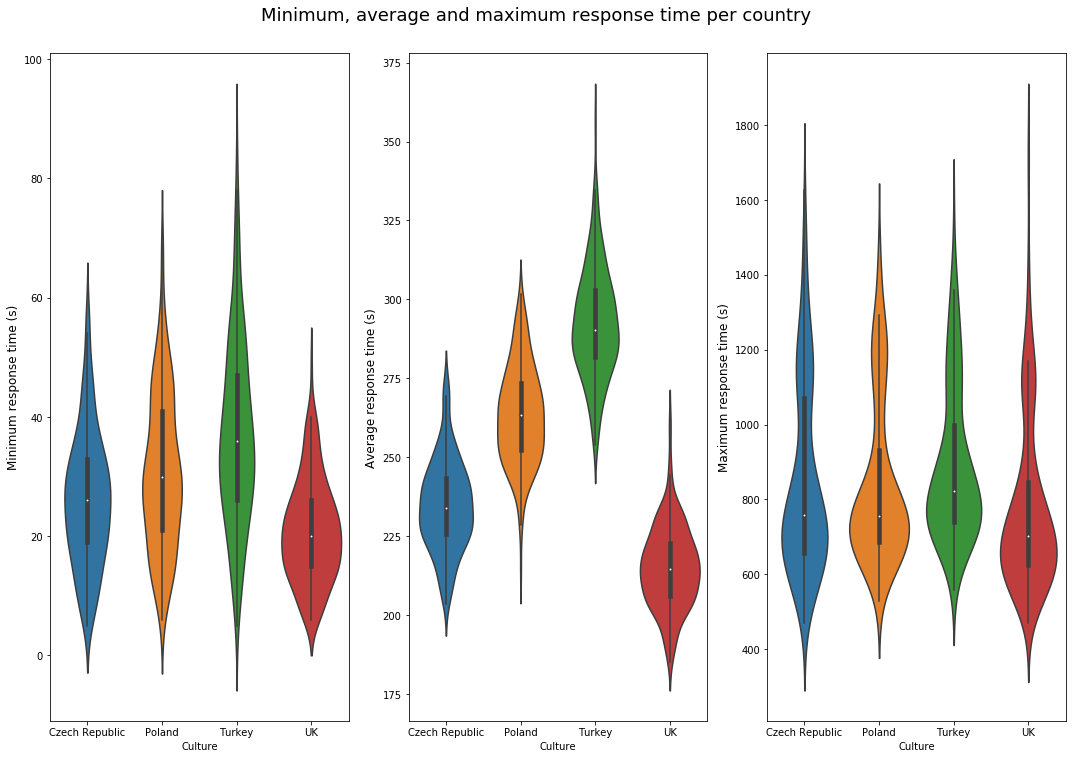

In [38]:
df_basic2=df_basic.loc[df_basic[ "AvgrespVist"]>175]


fig, axs = plt.subplots(1, 3, figsize=(15, 10), sharey=False)
#df_basic=df_basic.reset_index()
df_basic['MinRespvist']=df_basic['MinRespvist'].astype('float64')
df_basic['MaxRespvist']=df_basic['MaxRespvist'].astype('float64')



g1=sns.violinplot(x="Culture", y = "MinRespvist", data = df_basic2, ax=axs[0], order = [ "Czech Republic", "Poland", "Turkey", "UK"])

g2=sns.violinplot(x="Culture", y = "AvgrespVist", data = df_basic2, ax=axs[1], order = [ "Czech Republic", "Poland", "Turkey", "UK"])

g3=sns.violinplot (x="Culture", y = "MaxRespvist", data = df_basic2, ax=axs[2], order = [ "Czech Republic", "Poland", "Turkey", "UK"])

g1.set_ylabel('Minimum response time (s)', fontsize=12)
g2.set_ylabel('Average response time (s)', fontsize=12)
g3.set_ylabel('Maximum response time (s)', fontsize=12)


fig.suptitle('Minimum, average and maximum response time per country' , fontsize=18, y = 1.05)

plt.tight_layout()


plt.savefig("Responsetimesviolins.png", dpi=300, bbox_inches='tight')


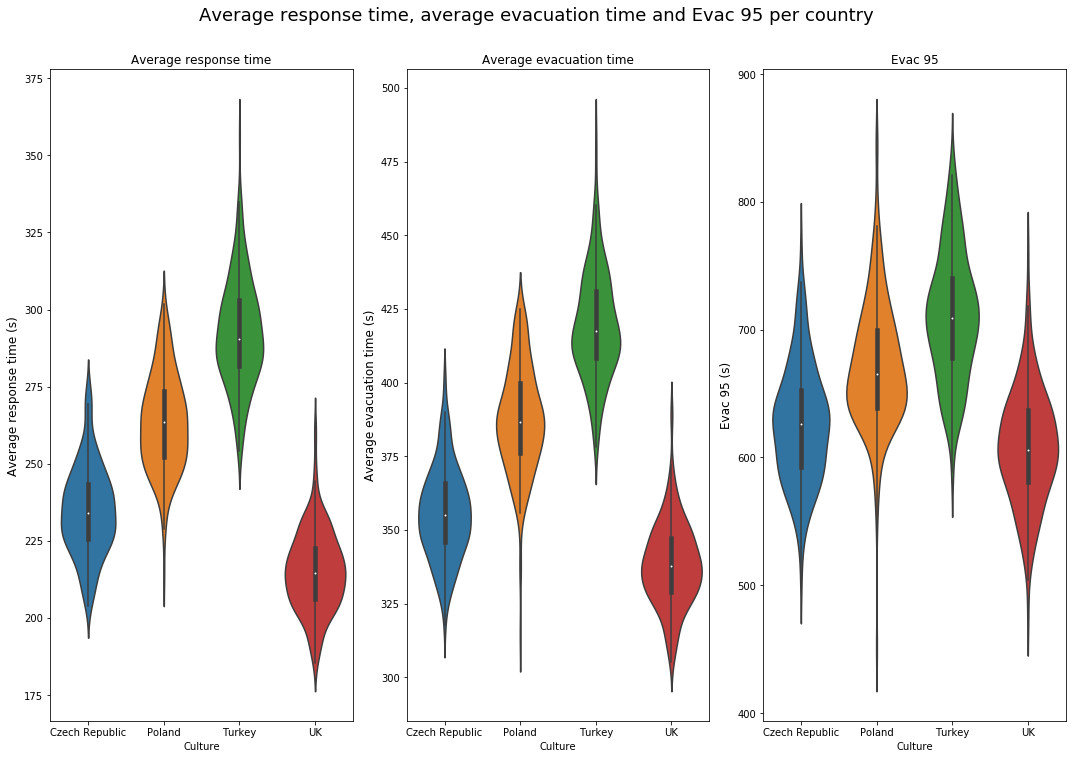

In [42]:
sns.set_palette("tab10")

fig, axs = plt.subplots(1, 3, figsize=(15, 10), sharey=False)


g1=sns.violinplot(x="Culture", y = "AvgrespVist", data = df_basic2, ax=axs[0], order = [ "Czech Republic", "Poland", "Turkey", "UK"])
g1.set_title("Average response time")
g2=sns.violinplot(x="Culture", y = "AvgevacVist", data = df_basic2, ax=axs[1], order = [ "Czech Republic", "Poland", "Turkey", "UK"])
g2.set_title("Average evacuation time")
g3= sns.violinplot(x="Culture", y = "Evac95", data = df_basic2, ax=axs[2], order = [ "Czech Republic", "Poland", "Turkey", "UK"])
g3.set_title("Evac 95")
g1.set_ylabel ( "Average response time (s)", fontsize=12)
g2.set_ylabel ( "Average evacuation time (s)", fontsize=12)

g3.set_ylabel ( "Evac 95 (s)", fontsize=12)

fig.suptitle('Average response time, average evacuation time and Evac 95 per country' , fontsize=18, y = 1.05)

plt.tight_layout()


plt.savefig("OutcomesViolins.png", dpi=300, bbox_inches='tight')



In [9]:
# Takes very long time to run

Response_distr_df=pd.DataFrame(columns=["Culture", "ResponseTime"])

for i in df_basic2.index:
    response_time_list= df_basic2["Response_times_visitors"][i]
    Culture2=df_basic2["Culture"][i]
    for y in response_time_list:
        Response_distr_df=Response_distr_df.append({'Culture': Culture2, 'ResponseTime': y}, ignore_index=True)

# Takes very long time to run

evac_distr_df=pd.DataFrame(columns=["Culture", "Evacuationtime"])

for i in df_basic.index:
    evac_time_list= df_basic["Evac_times_visitors"][i]
    Culture2=df_basic["Culture"][i]
    for y in evac_time_list:
        evac_distr_df=evac_distr_df.append({'Culture': Culture2, 'Evacuationtime': y}, ignore_index=True)



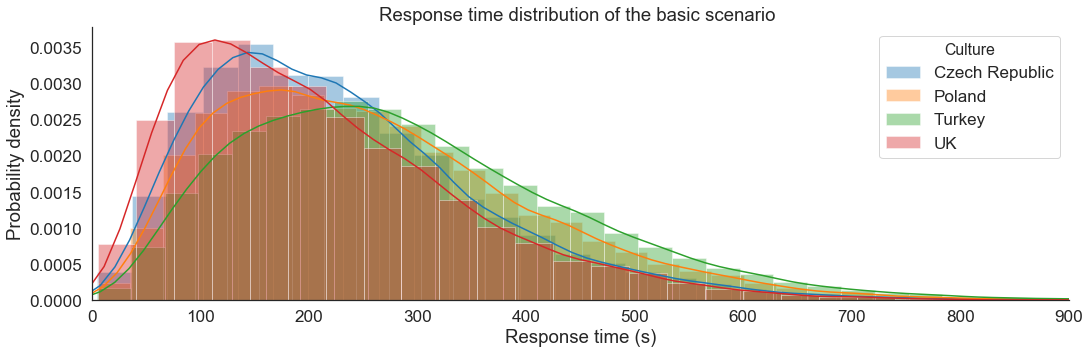

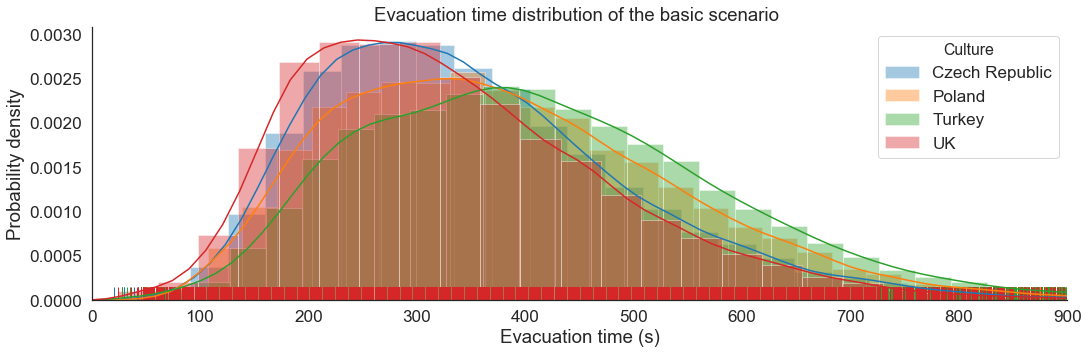

In [32]:

# Response time distribution

sns.set(font_scale=1.55 )
sns.set_palette("tab10")
sns.set_style("white")
g = sns.FacetGrid(Response_distr_df, hue="Culture", height=5, aspect=3,
                  hue_order=["Czech Republic", "Poland", "Turkey", "UK"],
                  legend_out=False
                  )
g = g.map(sns.distplot, "ResponseTime",  hist=True)
g.add_legend()
g.set(xlim=(0, 900))
g.set_xlabels('Response time (s)')
plt.ylabel("Probability density")
plt.title("Response time distribution of the basic scenario ")

# Evacuation time distribution
sns.set(font_scale=1.55 )
sns.set_palette("tab10")
sns.set_style("white")
g = sns.FacetGrid(evac_distr_df, hue="Culture", height=5, aspect=3,
                  hue_order=["Czech Republic", "Poland", "Turkey", "UK"],
                  legend_out=False
                  )
g = g.map(sns.distplot, "Evacuationtime",  hist=True)
g.add_legend()
g.set(xlim=(0, 900))
g.set_xlabels('Evacuation time (s)')
plt.ylabel("Probability density")
plt.xlim(0, 900)
plt.title("Evacuation time distribution of the basic scenario ")




In [44]:
# Test cause movement time
from ast import literal_eval

df_basic2.Movement_times_visitors= df_basic2.Movement_times_visitors.apply(literal_eval)
df_basic2.Notification_times_visitors= df_basic2.Notification_times_visitors.apply(literal_eval)
df_basic2.Response_times_visitors_excNotif= df_basic2.Response_times_visitors_excNotif.apply(literal_eval)


#df_Affiliation_avgevac["Movement_times_visitors"] 

df_basic2=df_basic2.reset_index()
df_basic2["Avgmovement"] = " "
df_basic2["Avgnotif"] = " "
df_basic2["Avgrespexclnotif"] = " "

for y in df_basic2.index:
    
    z=df_basic2.iloc[y]['Movement_times_visitors']
    df_basic2["Avgmovement"][y]=np.mean(z)
    
    z=df_basic2.iloc[y]['Notification_times_visitors']
    df_basic2["Avgnotif"][y]=np.mean(z)
    
    z=df_basic2.iloc[y]['Response_times_visitors_excNotif']
    df_basic2["Avgrespexclnotif"][y]=np.mean(z)
    
df_basic2['Avgmovement'] = df_basic2['Avgmovement'].astype(float, errors = 'raise')
df_basic2['Avgnotif'] = df_basic2['Avgnotif'].astype(float, errors = 'raise')
df_basic2['Avgrespexclnotif'] = df_basic2['Avgrespexclnotif'].astype(float, errors = 'raise')    
    

C:\Users\elvir\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\elvir\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\elvir\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\elvir\anac

In [45]:
df_basic_mean=df_basic2.groupby('Culture').mean()

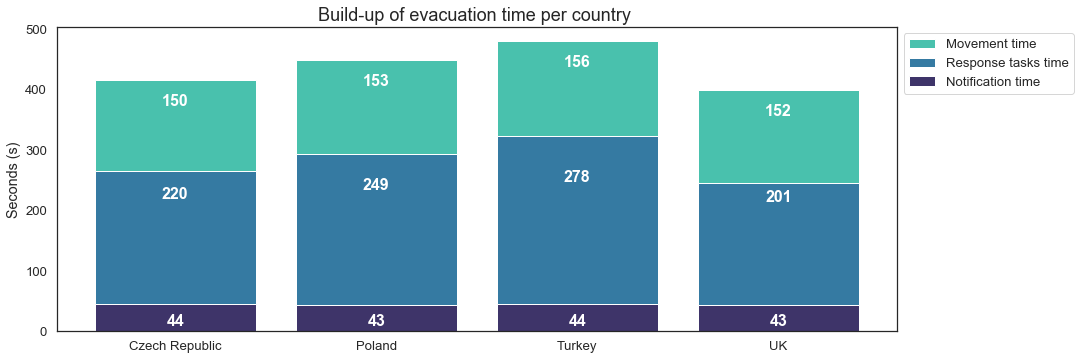

In [75]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("mako_r"), 3)
sns.set_palette("mako_r", 3)

fig, ax =plt.subplots( figsize=(15, 5 ))

ax1=ax.bar(df_basic_mean.index, (df_basic_mean['Avgrespexclnotif'] + df_basic_mean['Avgnotif']+ df_basic_mean['Avgmovement']), label= "Movement time")
ax2=ax.bar(df_basic_mean.index, (df_basic_mean['Avgrespexclnotif'] + df_basic_mean['Avgnotif']) , label= "Response tasks time" )
ax3=ax.bar(df_basic_mean.index,df_basic_mean['Avgnotif'], label= "Notification time" )

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()- r2.get_height()
    h2 = r2.get_height()- r3.get_height()
    h3= r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 + h2 + h3 / 2, "%d" % h1, ha="center", va="top", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2.5, "%d" % h2, ha="center", va="top", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2.,  h3/1.5 , "%d" % h3, ha="center", va="top", color="white", fontsize=16, fontweight="bold")



plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()

plt.ylabel("Seconds (s)")

plt.title("Build-up of evacuation time per country ", fontsize=18)

plt.savefig("timesoverview.png", dpi=300, bbox_inches='tight')

<h2>Sensitivity Analysis<h2>

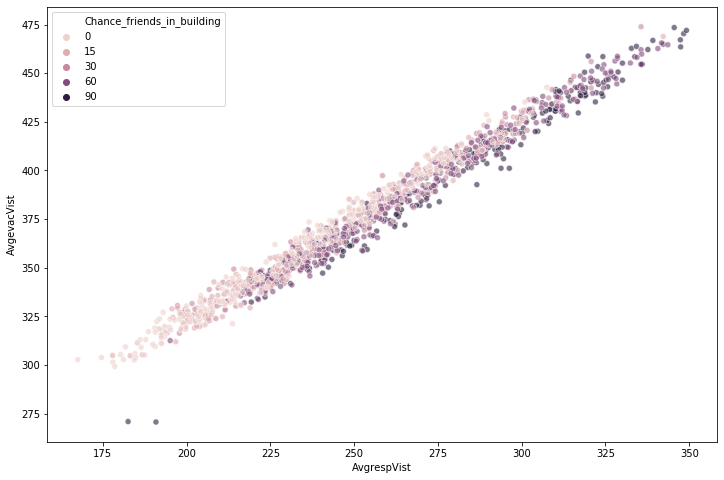

In [49]:
plt.figure(figsize=(12,8))
df_basic_friends=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_friends=df_basic_friends.loc[df_basic_friends[ "Num_staff"]==20]
df_basic_friends=df_basic_friends.loc[df_basic_friends[ "Familiarity"]==50]
df_basic_friends=df_basic_friends.loc[df_basic_friends[ "AvgrespVist"]>150]
df_basic_friends=df_basic_friends.loc[df_basic_friends[ "AvgevacVist"]>250]
df_basic_friends=df_basic_friends.loc[df_basic_friends[ "AvgrespVist"]<350]
sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_friends, hue= "Chance_friends_in_building",  legend="full", alpha=0.6);


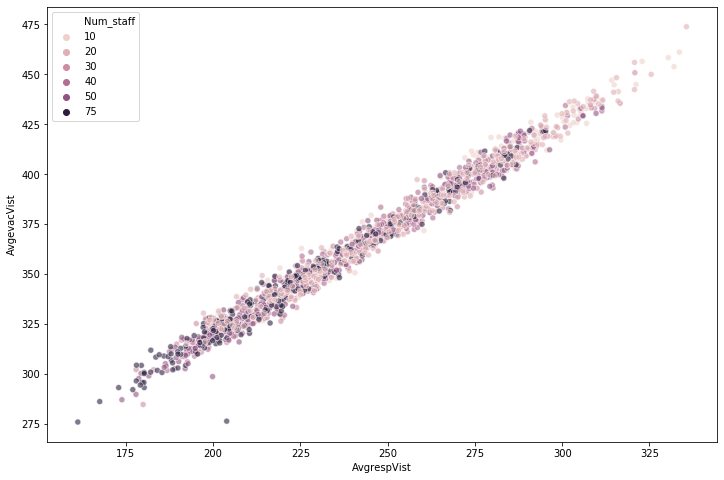

In [50]:
plt.figure(figsize=(12,8))
df_basic_staff=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_staff=df_basic_staff.loc[df_basic_staff[ "Chance_friends_in_building"]==30]
df_basic_staff=df_basic_staff.loc[df_basic_staff[ "Familiarity"]==50]
df_basic_staff=df_basic_staff.loc[df_basic_staff[ "AvgrespVist"]>150]
df_basic_staff=df_basic_staff.loc[df_basic_staff[  "AvgevacVist"]>250]
df_basic_staff=df_basic_staff.loc[df_basic_staff[ "AvgrespVist"]<350]

sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_staff, hue= "Num_staff", legend="full", alpha=0.6);

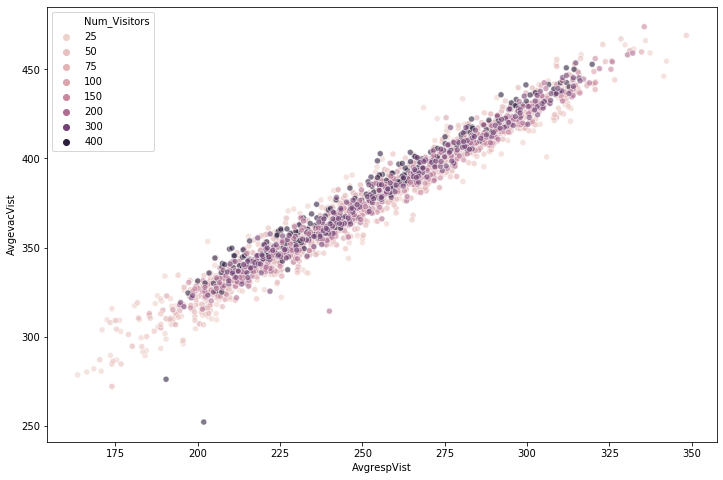

In [51]:
plt.figure(figsize=(12,8))
df_basic_visitors=df_allscenarios.loc[df_allscenarios[ "Chance_friends_in_building"]==30]
df_basic_visitors=df_basic_visitors.loc[df_basic_visitors[ "Num_staff"]==20]
df_basic_visitors=df_basic_visitors.loc[df_basic_visitors[ "Familiarity"]==50]
df_basic_visitors=df_basic_visitors.loc[df_basic_visitors[ "AvgrespVist"]>150]
df_basic_visitors=df_basic_visitors.loc[df_basic_visitors[ "AvgevacVist"]>250]
df_basic_visitors=df_basic_visitors.loc[df_basic_visitors[ "AvgrespVist"]<350]

sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_visitors, hue= "Num_Visitors", legend="full", alpha=0.6);

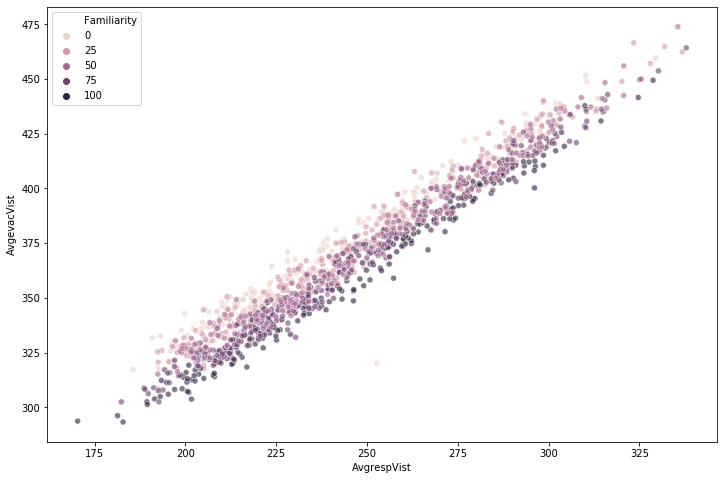

In [52]:
plt.figure(figsize=(12,8))
df_basic_Familiarity=df_allscenarios.loc[df_allscenarios[ "Chance_friends_in_building"]==30]
df_basic_Familiarity=df_basic_Familiarity.loc[df_basic_Familiarity[ "Num_staff"]==20]
df_basic_Familiarity=df_basic_Familiarity.loc[df_basic_Familiarity[ "Num_Visitors"]==150]

df_basic_Familiarity=df_basic_Familiarity.loc[df_basic_Familiarity[ "AvgrespVist"]>150]
df_basic_Familiarity=df_basic_Familiarity.loc[df_basic_Familiarity[ "AvgevacVist"]>250]
df_basic_Familiarity=df_basic_Familiarity.loc[df_basic_Familiarity[ "AvgrespVist"]<350]


sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_Familiarity, hue= "Familiarity", legend="full", alpha=0.6);

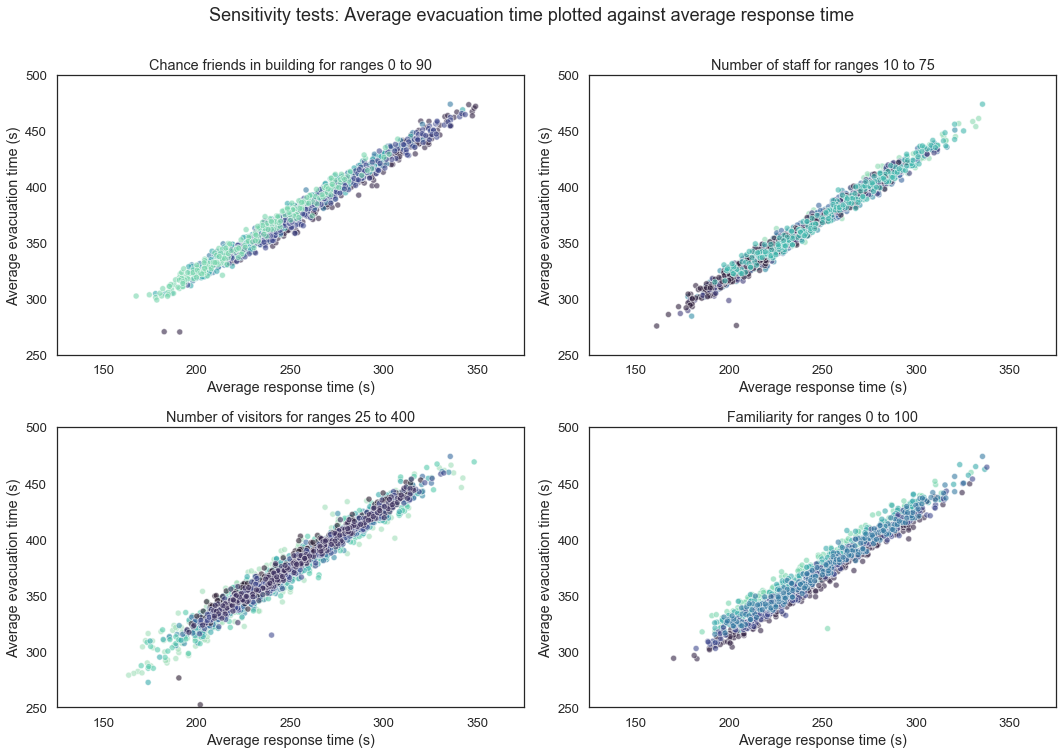

In [71]:
sns.set_palette("mako")
sns.set_style("white")

fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=False, sharex=False)

ax1=sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_friends, hue= "Chance_friends_in_building", legend = False,  alpha=0.6, ax=axs[0][0], palette=sns.color_palette('mako_r', n_colors=5) );
ax2=sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_staff, hue= "Num_staff", legend = False, alpha=0.6, ax=axs[0][1],  palette=sns.color_palette('mako_r', n_colors=6)  );
ax3=sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_visitors, hue= "Num_Visitors", legend = False, alpha=0.6, ax=axs[1][0],   palette=sns.color_palette('mako_r', n_colors=8) );
ax4=sns.scatterplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_Familiarity, hue= "Familiarity", legend = False, alpha=0.6, ax=axs[1][1],  palette=sns.color_palette('mako_r', n_colors=5) );

ax1.set_xlabel ( "Average response time (s)")
ax.set_ylim([275, 475])
ax2.set_xlabel ( "Average response time (s)")
ax3.set_xlabel ( "Average response time (s)")
ax4.set_xlabel ( "Average response time (s)")
ax1.set_ylabel ( "Average evacuation time (s)")
ax2.set_ylabel ( "Average evacuation time (s)")
ax3.set_ylabel ( "Average evacuation time (s)")
ax4.set_ylabel ( "Average evacuation time (s)")
ax1.set_ylim([250, 500])
ax2.set_ylim([250, 500])
ax3.set_ylim([250, 500])
ax4.set_ylim([250, 500])
ax1.set_xlim([125, 375])
ax2.set_xlim([125, 375])
ax3.set_xlim([125, 375])
ax4.set_xlim([125, 375])

ax1.set_title('Chance friends in building for ranges 0 to 90')
ax2.set_title('Number of staff for ranges 10 to 75')
ax3.set_title('Number of visitors for ranges 25 to 400')
ax4.set_title('Familiarity for ranges 0 to 100')


fig.suptitle('Sensitivity tests: Average evacuation time plotted against average response time' , fontsize=18, y = 1.05)

plt.tight_layout()


plt.savefig("ParameterinfluenceAvgevac.png", dpi=300, bbox_inches='tight')


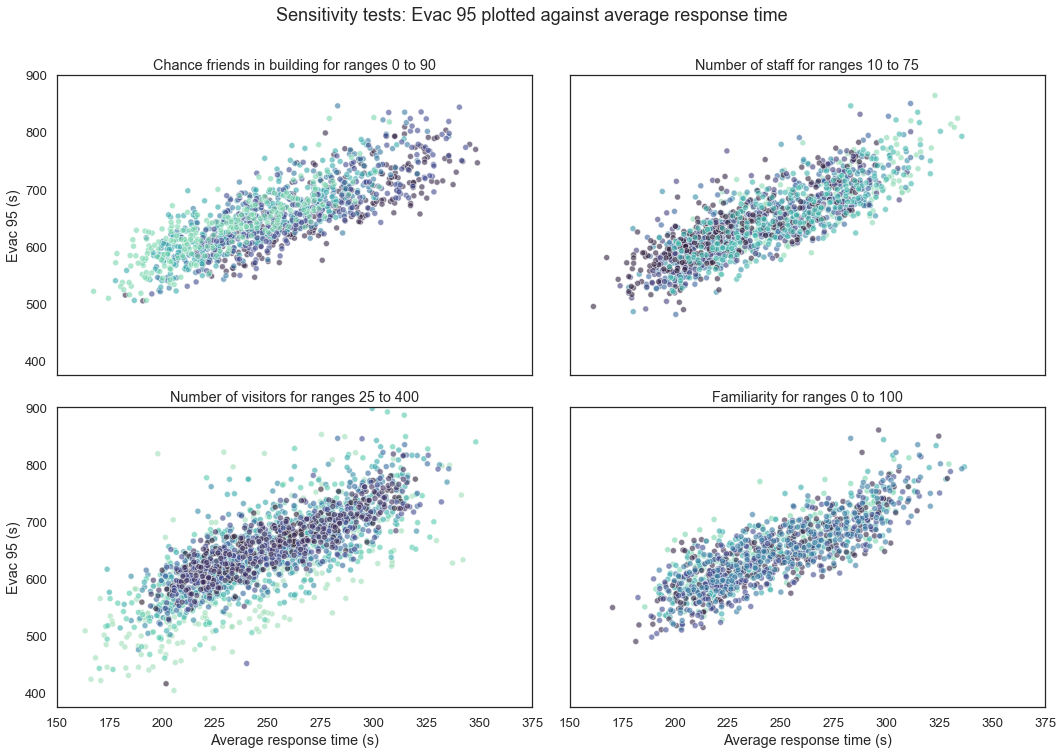

In [74]:
sns.set_palette("mako")

df_basic_Familiarity2=df_basic_Familiarity.loc[df_basic_Familiarity[ "Evac95"]<900]
df_basic_staff2=df_basic_staff.loc[df_basic_staff[ "Evac95"]<900]
df_basic_visitors2=df_basic_visitors.loc[df_basic_visitors[ "Evac95"]<900]
df_basic_friends2=df_basic_friends.loc[df_basic_friends[ "Evac95"]<900]


fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True, sharex=True)
ax1=sns.scatterplot(x="AvgrespVist", y="Evac95", data=df_basic_friends2, hue= "Chance_friends_in_building", legend = False,  alpha=0.6, ax=axs[0][0], palette=sns.color_palette('mako_r', n_colors=5) );
ax2=sns.scatterplot(x="AvgrespVist", y="Evac95", data=df_basic_staff2, hue= "Num_staff", legend = False, alpha=0.6, ax=axs[0][1],  palette=sns.color_palette('mako_r', n_colors=6)  );
ax3=sns.scatterplot(x="AvgrespVist", y="Evac95", data=df_basic_visitors2, hue= "Num_Visitors", legend = False, alpha=0.6, ax=axs[1][0],   palette=sns.color_palette('mako_r', n_colors=8) );
ax4=sns.scatterplot(x="AvgrespVist", y="Evac95", data=df_basic_Familiarity2, hue= "Familiarity", legend = False, alpha=0.6, ax=axs[1][1],  palette=sns.color_palette('mako_r', n_colors=5) );

ax1.set_title('Chance friends in building for ranges 0 to 90')
ax2.set_title('Number of staff for ranges 10 to 75')
ax3.set_title('Number of visitors for ranges 25 to 400')
ax4.set_title('Familiarity for ranges 0 to 100')

ax1.set_xlabel ( "Average response time (s)")
ax2.set_xlabel ( "Average response time (s)")
ax3.set_xlabel ( "Average response time (s)")
ax4.set_xlabel ( "Average response time (s)")

ax4.set_ylabel ( "Evac 95 (s)")
ax3.set_ylabel ( "Evac 95 (s)")
ax2.set_ylabel ( "Evac 95 (s)")
ax1.set_ylabel ( "Evac 95 (s)")

ax1.set_ylim([375, 900])
ax2.set_ylim([375, 900])
ax3.set_ylim([375, 900])
ax4.set_ylim([375, 900])
ax1.set_xlim([150, 375])
ax2.set_xlim([150, 375])
ax3.set_xlim([150, 375])
ax4.set_xlim([150, 375])

fig.suptitle('Sensitivity tests: Evac 95 plotted against average response time' , fontsize=18, y = 1.05)

plt.tight_layout()


plt.savefig("Parameterinfluenceevac95.png", dpi=300, bbox_inches='tight')


<Figure size 1080x720 with 0 Axes>

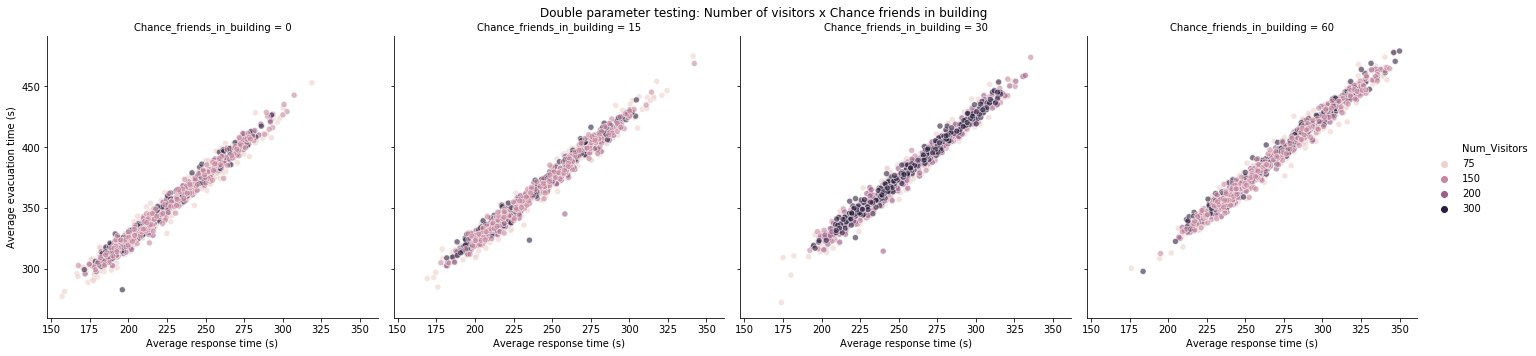

In [94]:
plt.figure(figsize=(15,10))
# Chance friends x num visitors
friends_values= [0, 15, 30,60]
visitor_values = [75, 150, 200, 300]
#df_basic_friends=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_friendsVisitors=df_allscenarios.loc[df_allscenarios[ "Num_staff"]==20]
df_basic_friendsVisitors=df_basic_friendsVisitors.loc[df_basic_friendsVisitors[ "Familiarity"]==50]
df_basic_friendsVisitors=df_basic_friendsVisitors.loc[df_basic_friendsVisitors[ "AvgrespVist"]>150]
df_basic_friendsVisitors=df_basic_friendsVisitors.loc[df_basic_friendsVisitors[ "AvgevacVist"]>250]
df_basic_friendsVisitors=df_basic_friendsVisitors.loc[df_basic_friendsVisitors[ "AvgrespVist"]<350]
df_basic_friendsVisitors=df_basic_friendsVisitors.loc[df_basic_friendsVisitors[ "Chance_friends_in_building"].isin(friends_values)]
df_basic_friendsVisitors=df_basic_friendsVisitors.loc[df_basic_friendsVisitors[ "Num_Visitors"].isin(visitor_values)]




g=sns.relplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_friendsVisitors, hue= "Num_Visitors",  legend="full", alpha=0.6, col="Chance_friends_in_building" )

g.fig.subplots_adjust(top=.9)
g.set_axis_labels("Average response time (s)", "Average evacuation time (s)")
g.fig.suptitle('Double parameter testing: Number of visitors x Chance friends in building')
plt.savefig("Numvist-friends.png", dpi=300)



<Figure size 1080x720 with 0 Axes>

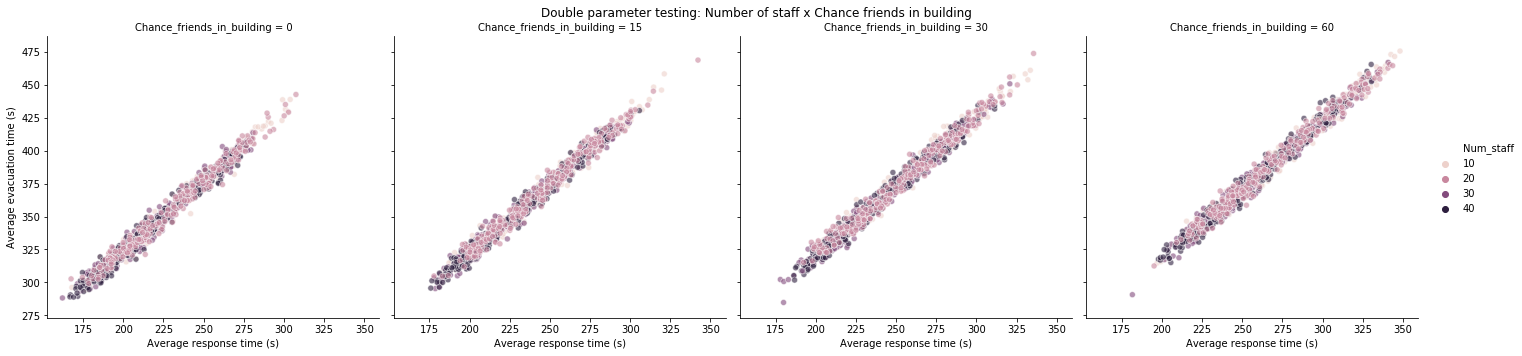

In [95]:
plt.figure(figsize=(15,10))
# Chance friends x staff
friends_values= [0, 15, 30,60]
visitor_values = [75, 150, 200, 300]
staff_values= [ 10,20,30,40]



#df_basic_friends=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_friendsstaff=df_allscenarios.loc[df_allscenarios[ "Num_staff"].isin(staff_values)]
df_basic_friendsstaff=df_basic_friendsstaff.loc[df_basic_friendsstaff[ "Familiarity"]==50]
df_basic_friendsstaff=df_basic_friendsstaff.loc[df_basic_friendsstaff[ "AvgrespVist"]>150]
df_basic_friendsstaff=df_basic_friendsstaff.loc[df_basic_friendsstaff[ "AvgevacVist"]>250]
df_basic_friendsstaff=df_basic_friendsstaff.loc[df_basic_friendsstaff[ "AvgrespVist"]<350]
df_basic_friendsstaff=df_basic_friendsstaff.loc[df_basic_friendsstaff[ "Chance_friends_in_building"].isin(friends_values)]
df_basic_friendsstaff=df_basic_friendsstaff.loc[df_basic_friendsstaff[ "Num_Visitors"]==150]




g= sns.relplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_friendsstaff, hue= "Num_staff",  legend="full", alpha=0.6, col="Chance_friends_in_building" )

g.fig.subplots_adjust(top=.9)
g.set_axis_labels("Average response time (s)", "Average evacuation time (s)")
g.fig.suptitle('Double parameter testing: Number of staff x Chance friends in building')
plt.savefig("Numstaff-friends.png", dpi=300)


<Figure size 1080x720 with 0 Axes>

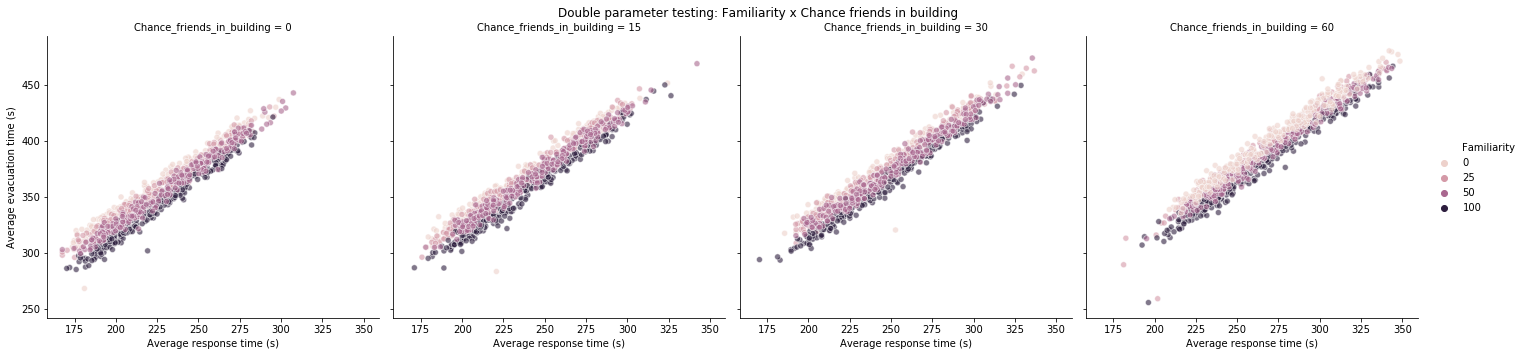

In [96]:
plt.figure(figsize=(15,10))
# Chance friends x familiarity
friends_values= [0, 15, 30,60]
visitor_values = [75, 150, 200, 300]
staff_values= [ 10,20,30,40]
familiarity_values = [0, 25, 50, 100]


#df_basic_friends=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_friendsfamiliarity=df_allscenarios.loc[df_allscenarios["Num_staff"]==20]
df_basic_friendsfamiliarity=df_basic_friendsfamiliarity.loc[df_basic_friendsfamiliarity[ "Familiarity"].isin(familiarity_values)]
df_basic_friendsfamiliarity=df_basic_friendsfamiliarity.loc[df_basic_friendsfamiliarity[ "AvgrespVist"]>150]
df_basic_friendsfamiliarity=df_basic_friendsfamiliarity.loc[df_basic_friendsfamiliarity[ "AvgevacVist"]>250]
df_basic_friendsfamiliarity=df_basic_friendsfamiliarity.loc[df_basic_friendsfamiliarity[ "AvgrespVist"]<350]
df_basic_friendsfamiliarity=df_basic_friendsfamiliarity.loc[df_basic_friendsfamiliarity[ "Chance_friends_in_building"].isin(friends_values)]
df_basic_friendsfamiliarity=df_basic_friendsfamiliarity.loc[df_basic_friendsfamiliarity[ "Num_Visitors"]==150]




g= sns.relplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_friendsfamiliarity, hue= "Familiarity",  legend="full", alpha=0.6, col="Chance_friends_in_building" )

g.fig.subplots_adjust(top=.9)
g.set_axis_labels("Average response time (s)", "Average evacuation time (s)")
g.fig.suptitle('Double parameter testing: Familiarity x Chance friends in building')
plt.savefig("Familiarity-friends.png", dpi=300)


<Figure size 1080x720 with 0 Axes>

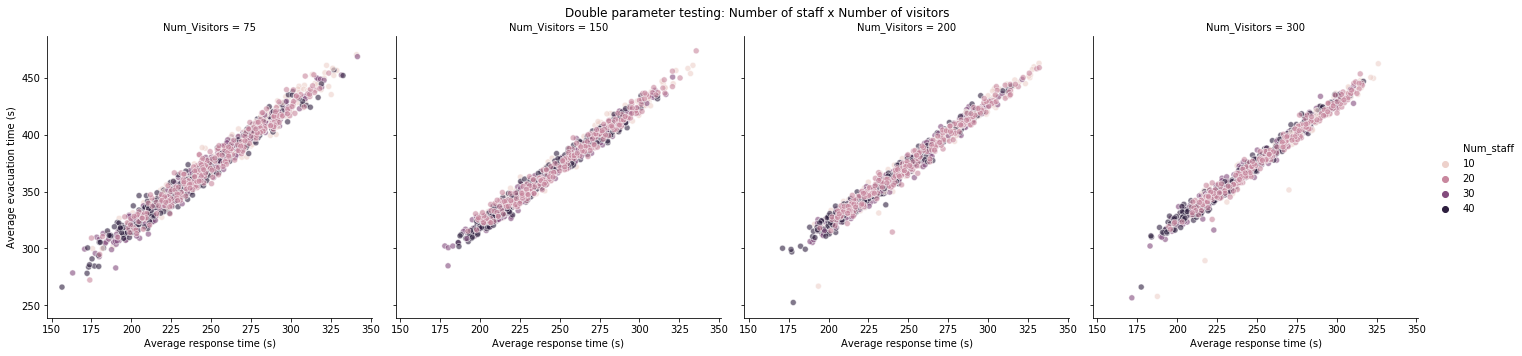

In [97]:
plt.figure(figsize=(15,10))
# Chance visitors x staff
friends_values= [0, 15, 30,60]
visitor_values = [75, 150, 200, 300]
staff_values= [ 10,20,30,40]
familiarity_values = [0, 25, 50, 100]


#df_basic_friends=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_visitorsstaff=df_allscenarios.loc[df_allscenarios["Num_staff"].isin(staff_values)]
df_basic_visitorsstaff=df_basic_visitorsstaff.loc[df_basic_visitorsstaff[ "Familiarity"]==50]
df_basic_visitorsstaff=df_basic_visitorsstaff.loc[df_basic_visitorsstaff[ "AvgrespVist"]>150]
df_basic_visitorsstaff=df_basic_visitorsstaff.loc[df_basic_visitorsstaff[ "AvgevacVist"]>250]
df_basic_visitorsstaff=df_basic_visitorsstaff.loc[df_basic_visitorsstaff[ "AvgrespVist"]<350]
df_basic_visitorsstaff=df_basic_visitorsstaff.loc[df_basic_visitorsstaff[ "Chance_friends_in_building"]==30]
df_basic_visitorsstaff=df_basic_visitorsstaff.loc[df_basic_visitorsstaff[ "Num_Visitors"].isin(visitor_values)]

g=sns.relplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_visitorsstaff, hue= "Num_staff",  legend="full", alpha=0.6, col="Num_Visitors" )

g.fig.subplots_adjust(top=.9)
g.set_axis_labels("Average response time (s)", "Average evacuation time (s)")
g.fig.suptitle('Double parameter testing: Number of staff x Number of visitors')
plt.savefig("staff-numvist.png", dpi=300)


<Figure size 1080x720 with 0 Axes>

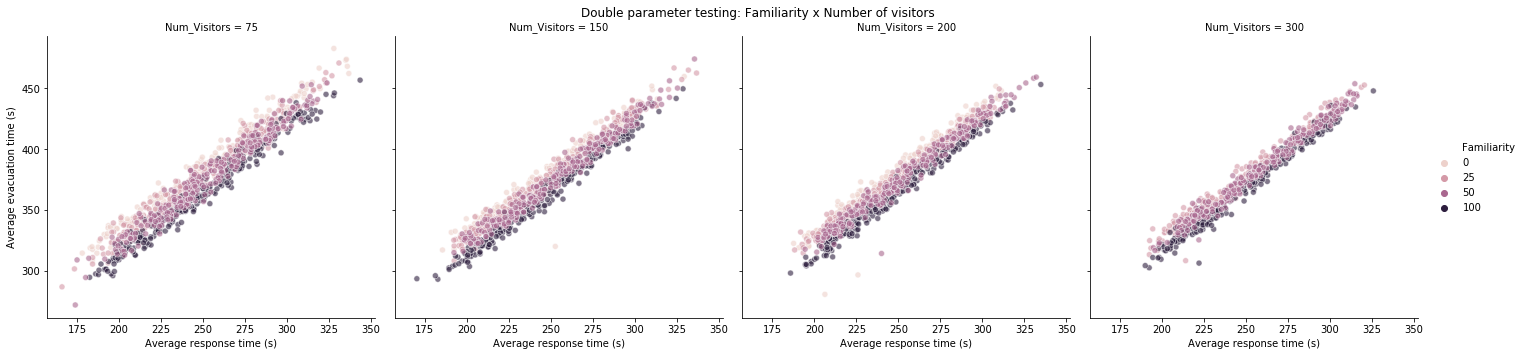

In [98]:
plt.figure(figsize=(15,10))
# Chance visitors x familiarity
friends_values= [0, 15, 30,60]
visitor_values = [75, 150, 200, 300]
staff_values= [ 10,20,30,40]
familiarity_values = [0, 25, 50, 100]


#df_basic_friends=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_visitorsfamiliarityf=df_allscenarios.loc[df_allscenarios["Num_staff"]==20]
df_basic_visitorsfamiliarityf=df_basic_visitorsfamiliarityf.loc[df_basic_visitorsfamiliarityf[ "Familiarity"].isin(familiarity_values)]
df_basic_visitorsfamiliarityf=df_basic_visitorsfamiliarityf.loc[df_basic_visitorsfamiliarityf[ "AvgrespVist"]>150]
df_basic_visitorsfamiliarityf=df_basic_visitorsfamiliarityf.loc[df_basic_visitorsfamiliarityf[ "AvgevacVist"]>250]
df_basic_visitorsfamiliarityf=df_basic_visitorsfamiliarityf.loc[df_basic_visitorsfamiliarityf[ "AvgrespVist"]<350]
df_basic_visitorsfamiliarityf=df_basic_visitorsfamiliarityf.loc[df_basic_visitorsfamiliarityf[ "Chance_friends_in_building"]==30]
df_basic_visitorsfamiliarityf=df_basic_visitorsfamiliarityf.loc[df_basic_visitorsfamiliarityf[ "Num_Visitors"].isin(visitor_values)]


g=sns.relplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_visitorsfamiliarityf, hue= "Familiarity",  legend="full", alpha=0.6, col="Num_Visitors" )
g.fig.subplots_adjust(top=.9)
g.set_axis_labels("Average response time (s)", "Average evacuation time (s)")
g.fig.suptitle('Double parameter testing: Familiarity x Number of visitors')
plt.savefig("familiarity-numvist.png", dpi=300)

<Figure size 1080x720 with 0 Axes>

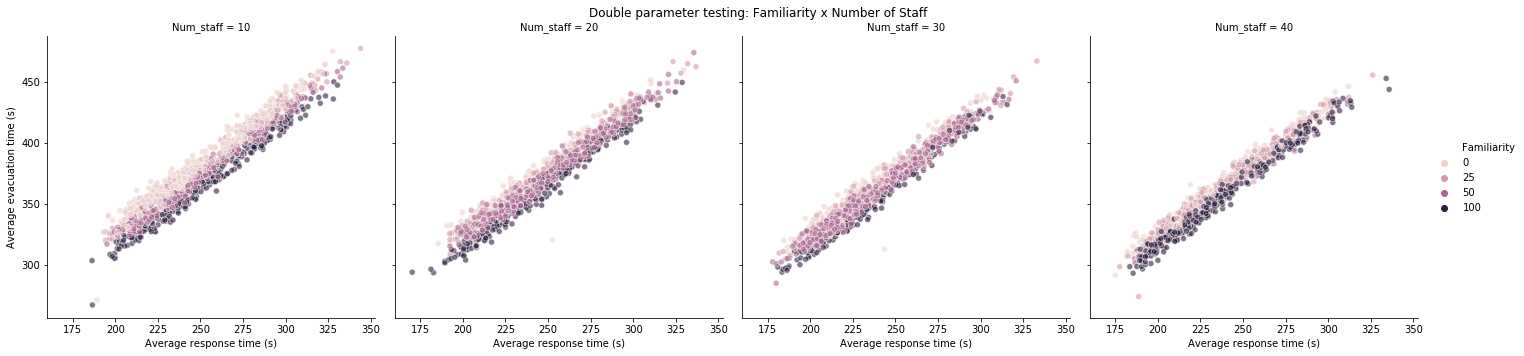

In [99]:
plt.figure(figsize=(15,10))
# Chance visitors x familiarity
friends_values= [0, 15, 30,60]
visitor_values = [75, 150, 200, 300]
staff_values= [ 10,20,30,40]
familiarity_values = [0, 25, 50, 100]


#df_basic_friends=df_allscenarios.loc[df_allscenarios[ "Num_Visitors"]==150]
df_basic_stafffamiliarityf=df_allscenarios.loc[df_allscenarios["Num_Visitors"]==150]
df_basic_stafffamiliarityf=df_basic_stafffamiliarityf.loc[df_basic_stafffamiliarityf[ "Familiarity"].isin(familiarity_values)]
df_basic_stafffamiliarityf=df_basic_stafffamiliarityf.loc[df_basic_stafffamiliarityf[ "AvgrespVist"]>150]
df_basic_stafffamiliarityf=df_basic_stafffamiliarityf.loc[df_basic_stafffamiliarityf[ "AvgevacVist"]>250]
df_basic_stafffamiliarityf=df_basic_stafffamiliarityf.loc[df_basic_stafffamiliarityf[ "AvgrespVist"]<350]
df_basic_stafffamiliarityf=df_basic_stafffamiliarityf.loc[df_basic_stafffamiliarityf[ "Chance_friends_in_building"]==30]
df_basic_stafffamiliarityf=df_basic_stafffamiliarityf.loc[df_basic_stafffamiliarityf[ "Num_staff"].isin(staff_values)]


g=sns.relplot(x="AvgrespVist", y="AvgevacVist", data=df_basic_stafffamiliarityf, hue= "Familiarity",  legend="full", alpha=0.6, col="Num_staff" )
g.fig.subplots_adjust(top=.9)
g.set_axis_labels("Average response time (s)", "Average evacuation time (s)")
g.fig.suptitle('Double parameter testing: Familiarity x Number of Staff')
plt.savefig("familiarity-numstaff.png", dpi=300)